# Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import re
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/data.csv')

In [ ]:
from keras.datasets import cifar10

In [ ]:
def load_dataset():
	# load dataset
	(X_train,y_train), (X_test,y_test) = cifar10.load_data()
	return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = load_dataset()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
num_classes=10

In [ ]:
feature_vector_length=32*32*3

X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')


Feature shape: (3072,)


In [ ]:
from sklearn.preprocessing import StandardScaler
feature_vector_length=32*32*3

In [ ]:
X_train, y_train, X_test, y_test = load_dataset()
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)
X_train.shape

(50000, 3072)

In [ ]:
X_scaled = StandardScaler().fit_transform(X_train)

In [ ]:
features = X_scaled.T

cov_matrix = np.cov(features)

In [ ]:
features.shape

In [ ]:
cov_matrix.shape

(3072, 3072)

In [ ]:
values, vectors = np.linalg.eig(cov_matrix)

In [ ]:
vectors.shape

(3072, 3072)

In [ ]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

In [ ]:
cum_variances=np.cumsum(explained_variances)

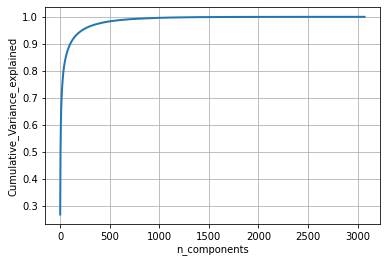

In [ ]:
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_variances,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [ ]:
for index,var in enumerate(cum_variances):  
    print('if n_components= %d,   variance=%f' %(index,100*np.round(var,3)))

if n_components= 0,   variance=26.900000
if n_components= 1,   variance=38.300000
if n_components= 2,   variance=45.500000
if n_components= 3,   variance=49.300000
if n_components= 4,   variance=52.900000
if n_components= 5,   variance=55.900000
if n_components= 6,   variance=58.700000
if n_components= 7,   variance=60.800000
if n_components= 8,   variance=62.900000
if n_components= 9,   variance=64.400000
if n_components= 10,   variance=65.700000
if n_components= 11,   variance=66.900000
if n_components= 12,   variance=68.000000
if n_components= 13,   variance=69.000000
if n_components= 14,   variance=70.000000
if n_components= 15,   variance=70.800000
if n_components= 16,   variance=71.600000
if n_components= 17,   variance=72.300000
if n_components= 18,   variance=73.000000
if n_components= 19,   variance=73.600000
if n_components= 20,   variance=74.200000
if n_components= 21,   variance=74.800000
if n_components= 22,   variance=75.400000
if n_components= 23,   variance=75.900000
if

In [ ]:
### if n_components= 645,   variance=99.000000
### if n_components= 440,   variance=98.000000
### if n_components= 334,   variance=97.000000
### if n_components= 265,   variance=96.000000
### if n_components= 218,   variance=95.000000
### if n_components= 182,   variance=94.000000
### if n_components= 155,   variance=93.000000
### if n_components= 133,   variance=92.000000
### if n_components= 115,   variance=91.000000
### if n_components= 101,   variance=90.000000

In [ ]:
projected=np.zeros((50000,646))
for i in range(646):
  projected[:,i]=X_scaled.dot(vectors.T[i])


In [ ]:
projected.shape
df1=pd.DataFrame(projected)
df1['Y'] = y_train

,0,1,2,3,4,5,6,7,8,9,...,637,638,639,640,641,642,643,644,645,Y
0,22.055738,-12.284904,-8.961351,-2.201911,-21.457722,2.195232,-2.225317,8.148078,11.972863,-4.706744,...,-0.404648,0.126293,-0.366363,0.140304,0.257502,0.257396,0.053311,-0.006438,0.368513,6
1,-4.013549,5.049156,-25.395892,6.979457,-0.992476,6.300391,-3.817773,6.929805,8.359594,-8.405247,...,0.029072,-0.589780,0.304222,-0.168454,-0.456028,0.237265,-0.020456,-0.314767,-0.351321,9
2,-21.112303,47.687197,12.573551,11.007741,-0.429632,-10.268180,5.649339,4.473428,-7.092960,1.095217,...,-0.425519,-0.315318,-0.316158,-0.020238,-0.207607,-0.153136,0.404395,-0.064154,-0.134510,9
3,39.231269,-2.334025,-5.719679,-1.312523,-8.502865,3.164093,-1.983400,3.789526,5.916827,1.671703,...,-0.091725,0.282755,0.249159,-0.200513,-0.159366,-0.150338,0.282806,0.105004,0.183782,4
4,15.571606,16.687922,-5.620042,11.580972,9.893043,12.706107,16.608760,10.200970,15.147313,7.825717,...,-0.119657,-0.192940,-0.087166,0.054448,-0.397803,-0.271906,0.261924,0.095888,0.554538,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-25.147650,26.486161,-37.585963,1.325465,7.990773,8.010790,1.572616,3.317301,-4.662349,5.246007,...,-0.082428,-0.263884,-0.081344,0.021430,-0.123263,-0.136292,-0.139707,0.094075,-0.385524,2
49996,-26.226940,-5.532838,28.546700,-14.302536,-42.448823,0.047304,3.360283,-12.806096,0.779546,-7.850363,...,-0.165651,-0.438524,0.167262,0.202797,-0.424164,0.115188,-0.263102,-0.341795,0.055224,6
49997,5.790113,44.924414,4.247257,3.065315,15.390313,-10.806235,5.126464,-0.128807,-5.925116,-3.658402,...,0.139799,0.354175,0.343709,-0.111955,-0.132139,-0.105990,-0.020454,-0.420141,0.254139,9
49998,-42.391786,16.551181,-22.266030,4.706101,-1.101832,8.489123,12.794826,-2.556941,-3.675472,1.930021,...,-0.137468,0.305211,0.386703,0.727511,0.077475,-0.911793,0.740592,-0.017557,-0.293666,1


In [ ]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y_train
res

,PC1,PC2,Y
0,22.055738,-12.284904,6
1,-4.013549,5.049156,9
2,-21.112303,47.687197,9
3,39.231269,-2.334025,4
4,15.571606,16.687922,1
...,...,...,...
49995,-25.147650,26.486161,2
49996,-26.226940,-5.532838,6
49997,5.790113,44.924414,9
49998,-42.391786,16.551181,1


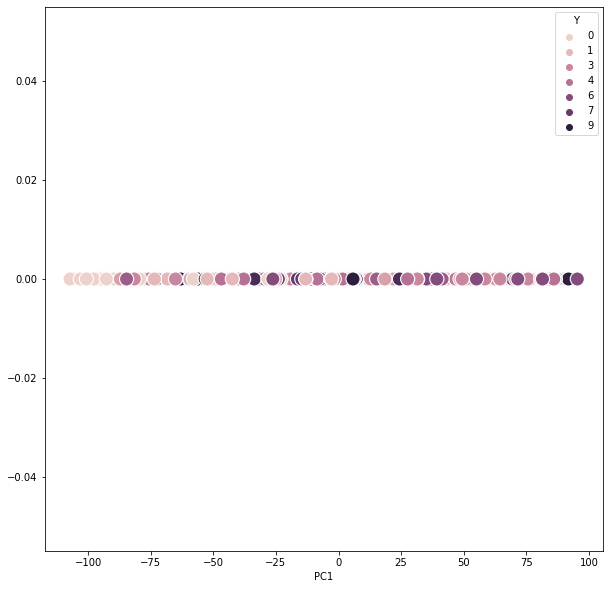

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=200)

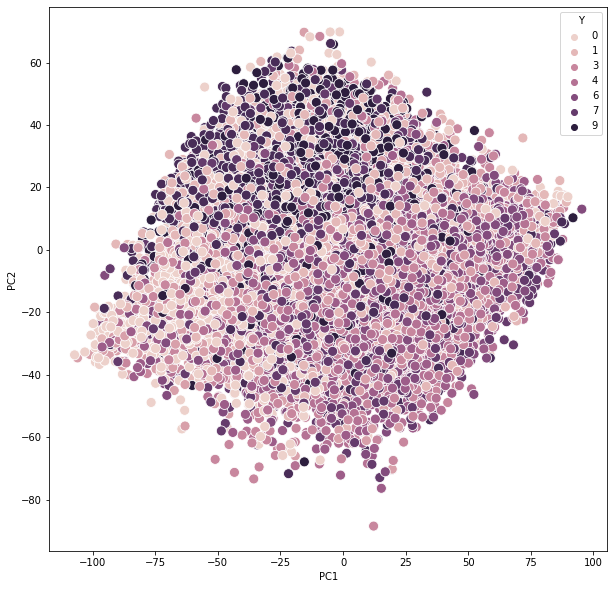

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


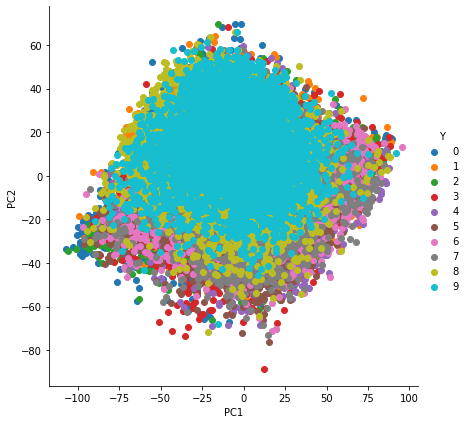

In [ ]:
sns.FacetGrid(res,hue='Y',size=6).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()

In [ ]:
X = df1.drop('Y',axis =1).values
y = df1['Y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
model = Sequential()
model.add(Dense(512,  activation='relu', input_shape=(646,)))
model.add(Dense(128,  activation='relu'))
model.add(Dense(10,    activation='softmax'))
model.compile(loss='mean_squared_error', optimizer = Adam())
trained_model = model.fit(X_train,y_train, batch_size=16, epochs=200, verbose=1, validation_data=(X_test,y_test))

Epoch 1/200
2500/2500 [==============================] - 11s 3ms/step - loss: 27.5405 - val_loss: 27.8890
Epoch 2/200
2500/2500 [==============================] - 10s 4ms/step - loss: 27.5403 - val_loss: 27.8890
Epoch 3/200
2500/2500 [==============================] - 8s 3ms/step - loss: 27.5403 - val_loss: 27.8890
Epoch 4/200
2500/2500 [==============================] - 8s 3ms/step - loss: 27.5403 - val_loss: 27.8890
Epoch 5/200
2500/2500 [==============================] - 7s 3ms/step - loss: 27.5403 - val_loss: 27.8890
Epoch 6/200
2500/2500 [==============================] - 9s 3ms/step - loss: 27.5403 - val_loss: 27.8890
Epoch 7/200
2500/2500 [==============================] - 8s 3ms/step - loss: 27.5403 - val_loss: 27.8890
Epoch 8/200
2500/2500 [==============================] - 7s 3ms/step - loss: 27.5403 - val_loss: 27.8890
Epoch 9/200
2500/2500 [==============================] - 8s 3ms/step - loss: 27.5403 - val_loss: 27.8890
Epoch 10/200
2500/2500 [=============================

KeyboardInterrupt: ignored

In [ ]:
autoencoder = Sequential()
autoencoder.add(Dense(512,  activation='elu', input_shape=(3072,)))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(10,    activation='linear', name="bottleneck"))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(512,  activation='elu'))
autoencoder.add(Dense(3072,  activation='sigmoid'))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
trained_model = autoencoder.fit(X_train,X_train, batch_size=1024, epochs=200, verbose=1, validation_data=(X_test,X_test))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(X_train)  # bottleneck representation
decoded_output = autoencoder.predict(X_train)        # reconstruction
encoding_dim = 10

# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)

Epoch 1/200
49/49 [==============================] - 3s 38ms/step - loss: 0.0446 - val_loss: 0.0327
Epoch 2/200
49/49 [==============================] - 1s 29ms/step - loss: 0.0285 - val_loss: 0.0253
Epoch 3/200
49/49 [==============================] - 1s 29ms/step - loss: 0.0243 - val_loss: 0.0237
Epoch 4/200
49/49 [==============================] - 1s 29ms/step - loss: 0.0232 - val_loss: 0.0226
Epoch 5/200
49/49 [==============================] - 1s 28ms/step - loss: 0.0225 - val_loss: 0.0224
Epoch 6/200
49/49 [==============================] - 1s 29ms/step - loss: 0.0223 - val_loss: 0.0223
Epoch 7/200
49/49 [==============================] - 1s 28ms/step - loss: 0.0221 - val_loss: 0.0222
Epoch 8/200
49/49 [==============================] - 1s 28ms/step - loss: 0.0222 - val_loss: 0.0221
Epoch 9/200
49/49 [==============================] - 1s 28ms/step - loss: 0.0219 - val_loss: 0.0221
Epoch 10/200
49/49 [==============================] - 1s 28ms/step - loss: 0.0219 - val_loss: 0.0221

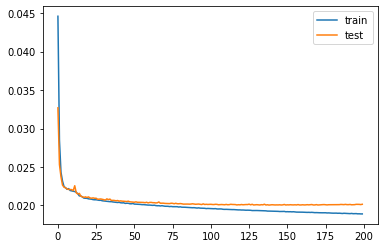

In [ ]:
plt.plot(trained_model.history['loss'], label='train')
plt.plot(trained_model.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)

In [ ]:
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
print(yhat)
print(y_test)
acc = accuracy_.score(y_test, yhat)
print(acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2 8 8 ... 5 5 7]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
0.3322


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


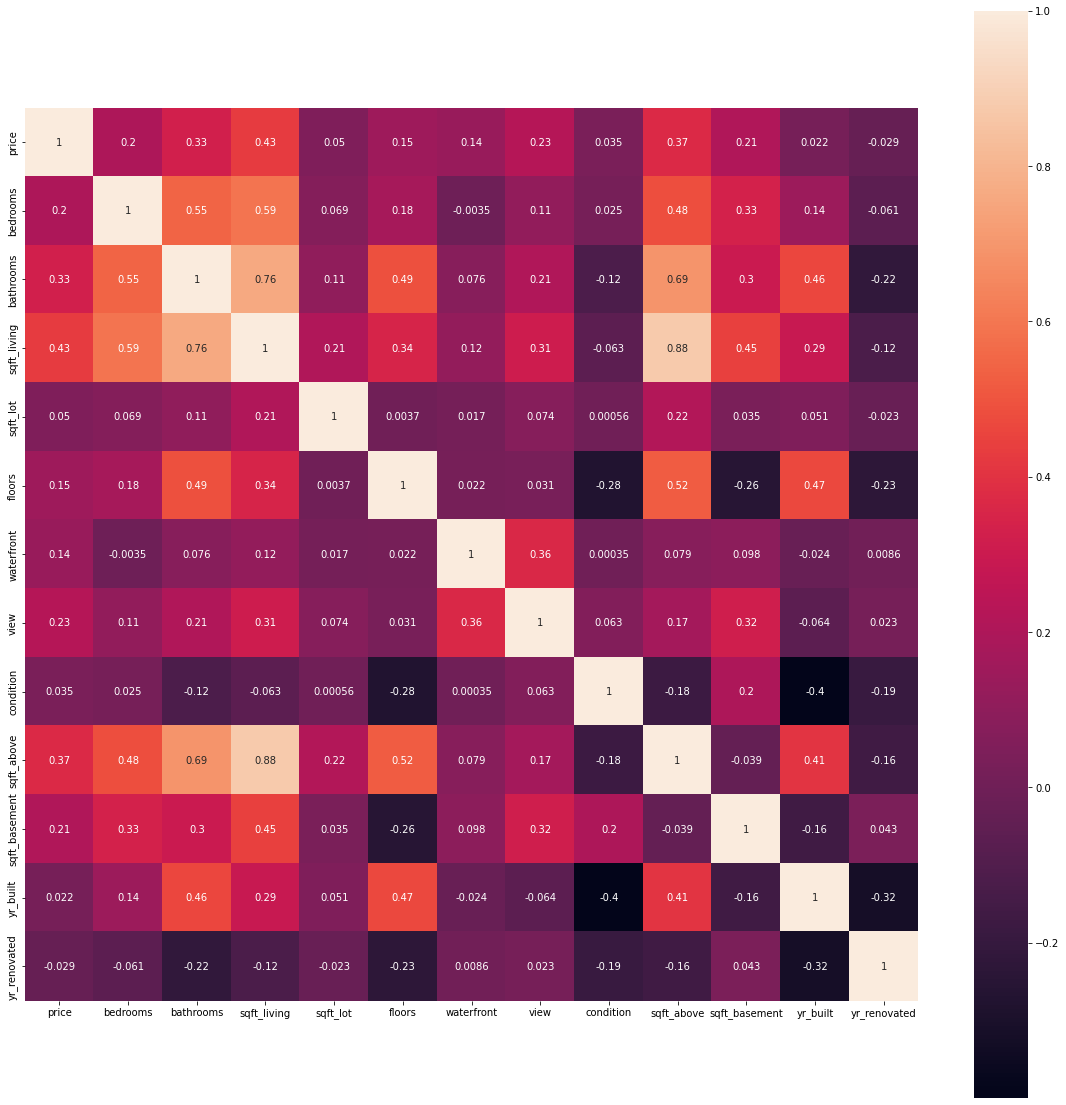

In [ ]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat, square=True,annot=True);

## Feature Importance

In [7]:
Data=df

In [8]:
print('Replaced {} rows with the average' .format(len(Data[Data.price==0])))
print('price average is equal to:',Data["price"].mean())
Data['price']=Data['price'].replace(0,Data['price'].mean())

Replaced 49 rows with the average
price average is equal to: 551962.9884732141


In [9]:
def preprocess_name(text_col):
    preprocessed_names = []
    for sentence in tqdm(text_col.values):
        sent = sentence.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        preprocessed_names.append(sent.lower().strip())
    return preprocessed_names

In [10]:
preprocessed_names=preprocess_name(Data['street'])
preprocessed_city=preprocess_name(Data['city'])
preprocessed_date=preprocess_name(Data['date'])
preprocessed_statezip=preprocess_name(Data['statezip'])
for i in range(len(preprocessed_date)):
    preprocessed_date[i]=preprocessed_date[i][0:10]
    preprocessed_statezip[i]=preprocessed_statezip[i][3:] 

100%|██████████| 4600/4600 [00:00<00:00, 286024.73it/s]


In [11]:
Data['statezip']=preprocessed_statezip
Data['date']=preprocessed_date
Data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014 05 02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133,USA
1,2014 05 02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,98119,USA
2,2014 05 02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,98042,USA
3,2014 05 02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,98008,USA
4,2014 05 02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014 07 09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,98133,USA
4596,2014 07 09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,98007,USA
4597,2014 07 09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,98059,USA
4598,2014 07 10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,98178,USA


In [12]:
label_encoder = LabelEncoder()
Data["city"] = label_encoder.fit_transform(Data["city"])
Data["street"] = label_encoder.fit_transform(Data["street"])
Data["date"] = label_encoder.fit_transform(Data["date"])
Data["country"] = label_encoder.fit_transform(Data["country"])

In [13]:
X = Data.drop('price',axis =1)
y = Data['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train)
importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': model.coef_})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
3,sqft_living,114809.542363
9,sqft_above,106484.495168
2,bathrooms,46999.226249
7,view,44575.711820
10,sqft_basement,38785.385431
14,city,31428.145730
6,waterfront,29874.414935
8,condition,27050.788314
5,floors,18383.660254
0,date,9319.995913


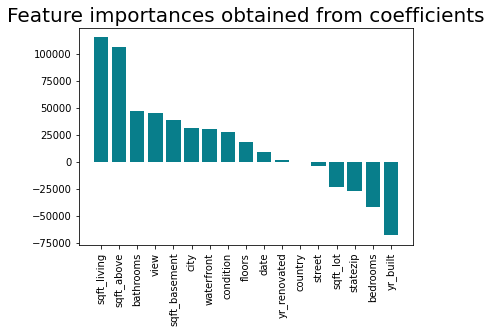

In [16]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
13,street,0.623104
3,sqft_living,0.187174
14,city,0.030892
15,statezip,0.029156
10,sqft_basement,0.020273
11,yr_built,0.018912
4,sqft_lot,0.016104
9,sqft_above,0.015709
2,bathrooms,0.015219
0,date,0.012886


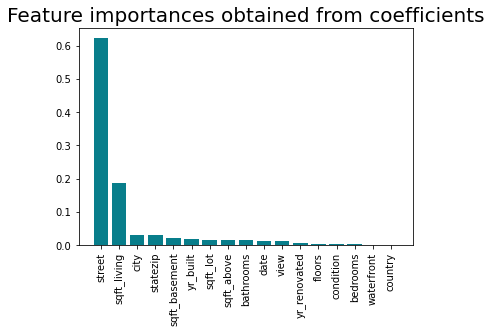

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()